# Validation Results Camara Compton Simulation

__Author: Antonio Gómez Carrera__

In [1]:
import ROOT

Welcome to JupyROOT 6.26/10


Import the file and define canvas

In [2]:
file = ROOT.TFile('validation.root')

Parameters used:

```
    _world_width = 682*mm;
    _world_height = 562*mm;
    _world_depth = 354*mm;

    _detector_size = 300*mm;
    _detector_thickness = 150*um;
    _detector_number = 2;
    
    _detector_distance[1] = 100*mm;
    _detector_distance[2] = 200*mm;
    
    Particle_Energy = 70keV

```

Beam of 5000000 particles


### Events

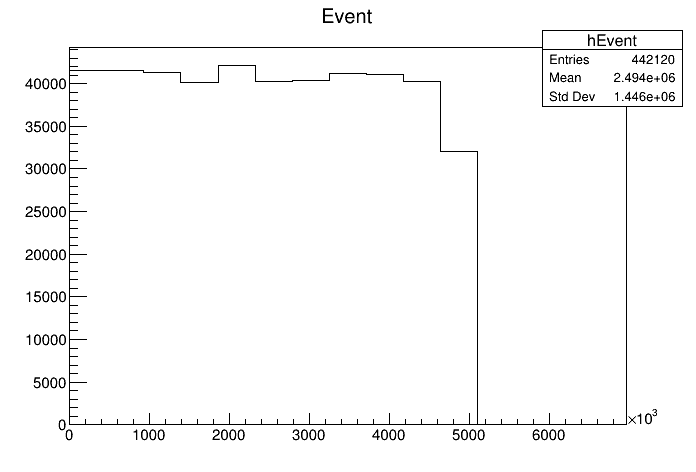

In [6]:
c = ROOT.TCanvas()
# Select automatically number of bins
hEvent = file.Hits.Draw("Event>>hEvent(auto)","","")
c.Draw()


### Particle ID

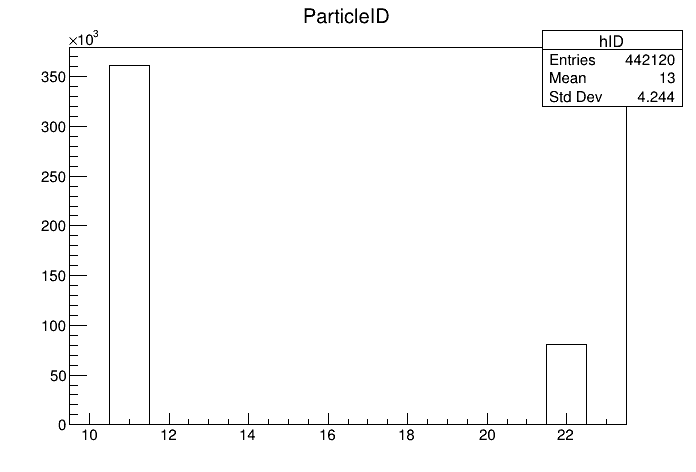

In [4]:
c1 = ROOT.TCanvas()
hPartID = file.Hits.Draw("ParticleID>>hID(14,9.5,23.5)","","")
c1.Draw()

11-> e-

22 -> Photons

### Detector ID

In [ ]:
c2 = ROOT.TCanvas()
c2.SetLogy()
c2.Draw()
hPartIDlog = file.Hits.Draw("DetectorID","","")


### Position

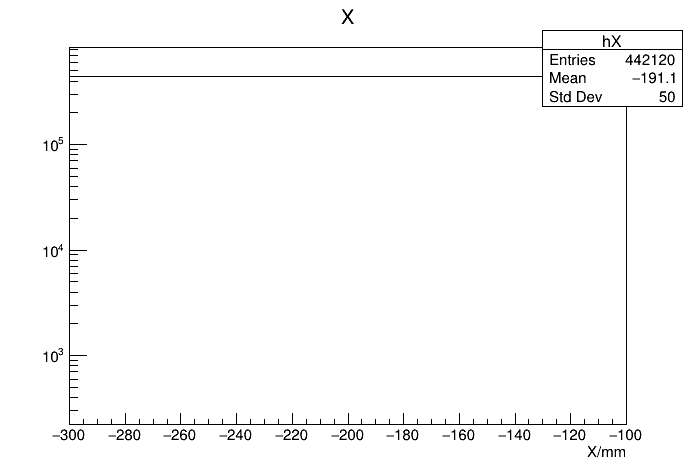

In [10]:
c3 = ROOT.TCanvas()
c3.SetLogy()
# Select automaticaly number of bins
file.Hits.Draw("X>>hX", "", "HIST")
hX = ROOT.gDirectory.Get("hX")
hX.GetXaxis().SetTitle('X/mm')
c3.Draw()

In [ ]:
c4 = ROOT.TCanvas()
c4.SetLogy()
file.Hits.Draw("Y>>hY", "","")
hY = ROOT.gDirectory.Get("hY")
hY.GetXaxis().SetTitle('Y/mm')
c4.Draw()

In [ ]:
c4a = ROOT.TCanvas()
c4a.SetLogy()
file.Hits.Draw("Y>>hY", "DetectorID == 1 && TrackID == 1","")
hY = ROOT.gDirectory.Get("hY")
hY.GetXaxis().SetTitle('Y/mm')
c4a.Draw()

In [ ]:
c5 = ROOT.TCanvas()
c5.SetLogy()

file.Hits.Draw("Z>>hZ", "","")
hZ = ROOT.gDirectory.Get("hZ")
hZ.GetXaxis().SetTitle('Z/mm')
c5.Draw()

In [ ]:
c5a = ROOT.TCanvas()
c5a.SetLogy()
file.Hits.Draw("Z>>hZ", "DetectorID == 1 && TrackID == 1","")
hZ = ROOT.gDirectory.Get("hZ")
hZ.GetXaxis().SetTitle('Z/mm')
c5a.Draw()

### Momentum

In [ ]:
c6 = ROOT.TCanvas()
c6.SetLogy()
c6.SetTitle("pX/keV")
file.Hits.Draw("MomentumX>>hpX", "","")
hpX = ROOT.gDirectory.Get("hpX")
hpX.GetXaxis().SetTitle('pX/keV')
c6.Draw()

Why is there such a  big peak at pX = 0?
It means particle stopped or scaterred with a 90º angle(?)

Selecting only emitted photons interacting with the first detector--> Range of pX is highly reduced but same peak at px = 0

In [ ]:
c6a = ROOT.TCanvas()
c6a.SetLogy()
c6a.SetGrid()
file.Hits.Draw("MomentumX>>hpX","TrackID == 1 && DetectorID == 1", "")
hpX = ROOT.gDirectory.Get("hpX")
hpX.GetXaxis().SetTitle('pX/keV')
c6a.Draw()

To see if particle is scaterred in 90º angle, check py and pz when px = 0--> pY^2+pZ^2 = 0 so no particle moving --> Completeley absorbed, can it be a photoelectric effect and electron emission(?) 

In [ ]:
c6b = ROOT.TCanvas()
c6b.SetLogy()
file.Hits.Draw("MomentumZ^2+MomentumY^2>>hpX(100, -0.1,0.1)","MomentumX==0", "")
hpX = ROOT.gDirectory.Get("hpX")
hpX.GetXaxis().SetTitle('p^2/keV^2')
c6b.Draw()

Check Edep to be sure of complete absorption

In [ ]:
c6c = ROOT.TCanvas()
c6c.SetLogy()
file.Hits.Draw("Edep>>Edep()","TrackID == 1 && DetectorID == 1 && MomentumX ==0", "")
E = ROOT.gDirectory.Get("Edep")
E.GetXaxis().SetTitle('Edep/keV')
c6c.Draw()

High number of electrons emited from the photons, then it is possible to have photoelectric effect.

In [ ]:
c6d = ROOT.TCanvas()
c6d.SetLogy()
hpXd = file.Hits.Draw("ParticleID","ParentID == 1", "")
c6d.Draw()

Why negative pX in detector 1?

In [ ]:
c6e = ROOT.TCanvas()
c6e.SetLogy()
c6e.Divide(1,2)
c6e.cd(1)
file.Hits.Draw("MomentumY>>hpY()","TrackID == 1 && DetectorID == 1 && MomentumX<0", "")
hpY= ROOT.gDirectory.Get("hpY")
hpY.GetXaxis().SetTitle('pY/keV')
c6e.cd(2)
file.Hits.Draw("MomentumZ>>hpZ()","TrackID == 1 && DetectorID == 1 && MomentumX<0", "")
hpZ = ROOT.gDirectory.Get("hpZ")
hpZ.GetXaxis().SetTitle('pZ/keV')
c6e.Draw()

Not momentum preference in Y and Z

It exists any correlation with time?

In [ ]:
c6f = ROOT.TCanvas()
c6f.SetLogy()
c6f.Divide(1,2)
c6f.cd(1)
file.Hits.Draw("Time>>hT1()","TrackID == 1 && DetectorID == 1", "")
hT1 = ROOT.gDirectory.Get('hT1')
hT1.GetXaxis().SetTitle('t/ps')

c6f.cd(2)
file.Hits.Draw("Time>>hT2()","TrackID == 1 && DetectorID == 1 && MomentumX<0", "")
hT2 = ROOT.gDirectory.Get("hT2")
hT2.GetXaxis().SetTitle('t/ps')
c6f.Draw()

Similar restuls.

Check relation with Energy deposited

In [ ]:
c6g = ROOT.TCanvas()
c6g.SetLogy()
c6g.Divide(1,2)
c6g.cd(1)
file.Hits.Draw("Edep>>hE1()","TrackID == 1 && DetectorID == 1", "")
hE1 = ROOT.gDirectory.Get('hE1')
hE1.GetXaxis().SetTitle('Edep/keV')

c6g.cd(2)
file.Hits.Draw("Edep>>hE2()","TrackID == 1 && DetectorID == 1 && MomentumX<0", "")
hE2 = ROOT.gDirectory.Get("hE2")
hE2.GetXaxis().SetTitle('Edep/keV')
c6g.Draw()

Less particles with high energy (1.9keV) deposited, it maybe an interaction with the LGAD resulting in a backscaterring and probably a emission of an electron

In [ ]:
c6a = ROOT.TCanvas()
c6a.SetLogy()
file.Hits.Draw("Time>>hpY(1000,0,3000)","TrackID == 1 && DetectorID == 1 && MomentumX<0", "")
hpY= ROOT.gDirectory.Get("hpY")
hpY.GetXaxis().SetTitle('pY/keV')
c6a.Draw()

In [ ]:
c7 = ROOT.TCanvas()
c7.SetLogy()
file.Hits.Draw("MomentumY>>hpY1()", "","")
hpY = ROOT.gDirectory.Get("hpY1")
hpY.GetXaxis().SetTitle('pY/keV')
c7.Draw()

In [ ]:
c8 = ROOT.TCanvas()
c8.SetLogy()
file.Hits.Draw("MomentumZ>>hpZ1()", "","")
hpZ = ROOT.gDirectory.Get("hpZ1")
hpZ.GetXaxis().SetTitle('pZ/keV')
c8.Draw()

### Time

In [ ]:
c9 = ROOT.TCanvas()
c9.SetLogy()
file.Hits.Draw("Time>>hT()", "","")
hT = ROOT.gDirectory.Get("hT")
hT.GetXaxis().SetTitle('t/ps')
c9.Draw()

### Energy deposited 

In [ ]:
c10 = ROOT.TCanvas()
c10.SetLogy()
file.Hits.Draw("Edep>>hEdep()","","")
hEdep = ROOT.gDirectory.Get("hEdep")
hEdep.GetXaxis().SetTitle('Edep/keV')
c10.Draw()